In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [3]:
df = pd.read_csv('./benchmarks/bench_20230920_112700_step=0.txt')

In [4]:
df["comp_bw"] = df["comp_throughput"]/1024/1024
df["decomp_bw"] = df["decomp_throughput"]/1024/1024
df["OriginalMB"] = df["OriginalSizeInByte"]/1024/1024
df["CompressedMB"] = df["CompressedSizeInByte"]/1024/1024
df.drop(["decomp_throughput","comp_throughput"],axis=1)

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,avg_decomp_time,std_dev_decomp_time,devName,comp_bw,decomp_bw,OriginalMB,CompressedMB
0,0.00001,1048576,1092823,0.959511,0.009225,0.0,1.136710e+08,0.047117,0.005417,0.076628,0.003130,gpu,21.223621,13.050052,1.0,1.042197
1,0.00001,2097152,1995871,1.050745,0.009337,0.0,2.245964e+08,0.046323,0.002316,0.066943,0.002487,gpu,43.174669,29.876194,2.0,1.903411
2,0.00001,4194304,2949559,1.422011,0.016567,0.0,2.531687e+08,0.048119,0.002807,0.069146,0.001938,gpu,83.127678,57.848679,4.0,2.812919
3,0.00001,8388608,4882711,1.718023,0.022575,0.0,3.715900e+08,0.060730,0.001398,0.078365,0.003156,gpu,131.729964,102.086070,8.0,4.656516
4,0.00001,16777216,9677275,1.733672,0.036947,0.0,4.540886e+08,0.088085,0.003117,0.088449,0.003744,gpu,181.642863,180.895365,16.0,9.228969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.00001,16777216,9677275,1.733672,0.037246,0.0,4.504378e+08,4.002000,0.042555,1.693106,0.023894,single,3.998001,9.450088,16.0,9.228969
174,0.00001,33554432,19421203,1.727722,0.056948,0.0,5.892074e+08,5.377069,0.029517,3.110681,0.023546,single,5.951197,10.287136,32.0,18.521502
175,0.00001,67108864,37424787,1.793166,0.118898,0.0,5.644242e+08,7.720936,0.022268,5.570670,0.008142,single,8.289151,11.488744,64.0,35.691058
176,0.00001,134217728,71986219,1.864492,0.216067,0.0,6.211848e+08,13.554242,0.063474,12.359061,0.022764,single,9.443538,10.356774,128.0,68.651408


In [13]:
data = df[(df["OriginalMB"] == 1024 * 4) & (df["tol"] == 0.1)]
data

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,comp_throughput,avg_decomp_time,std_dev_decomp_time,decomp_throughput,devName,comp_bw,decomp_bw,OriginalMB,CompressedMB
142,0.1,4294967296,165793405,25.905538,3.833126,0.0,1.120487e+09,11.735517,0.366181,3.659802e+08,6.037126,0.137538,7.114259e+08,gpu,349.025945,678.468567,4096.0,158.112912


In [16]:
data["comp_throughput"]/1024/1024
941/8

117.625

In [4]:
df_gpu = df[df["devName"]=="gpu"]

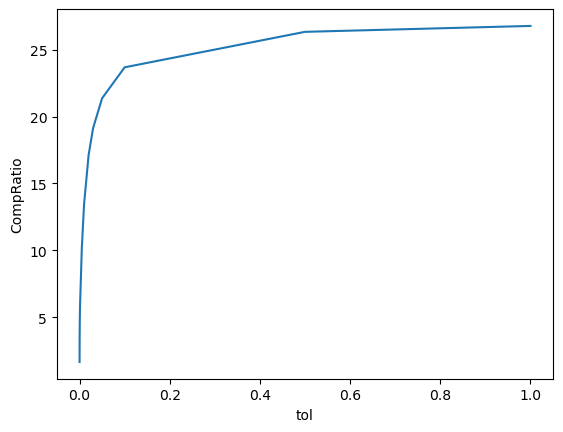

In [5]:
# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')
CompRatio = grouped_data.agg({"CompRatio":"mean"})
plt.plot(CompRatio.index,CompRatio["CompRatio"])
plt.xlabel("tol")
plt.ylabel("CompRatio")
plt.show()

In [6]:
def comp_ratio(tol):
    return np.interp(tol,CompRatio.index,CompRatio["CompRatio"])

test = comp_ratio(0.00001)
print(test)

1.673870109822227


Text(0, 0.5, 'comp_bw[MB/sec]')

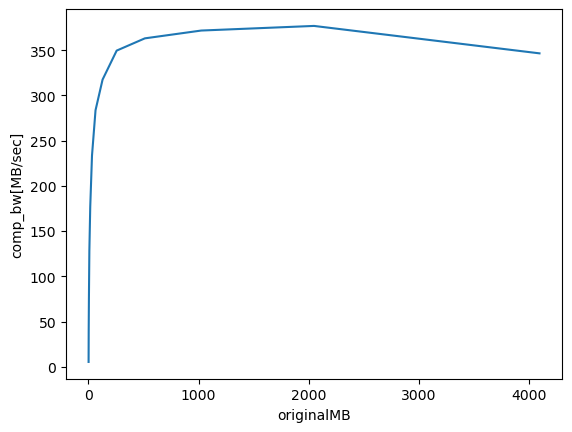

In [7]:
# こっちもinterpolarationをした方がいい気がしてきた
grouped_data = df_gpu.groupby("OriginalMB")
comp_mean = grouped_data.agg({'comp_bw':'mean'})
observed_comp_bw = comp_mean
observed_Ori_mb = comp_mean.index
plt.plot(observed_Ori_mb,observed_comp_bw)
plt.xlabel("originalMB")
plt.ylabel("comp_bw[MB/sec]")

In [8]:
def gpu_comp_bw(orisize):
    return np.interp(orisize, comp_mean.index, comp_mean["comp_bw"])

test = gpu_comp_bw(100)
print(test)

302.7018673026983


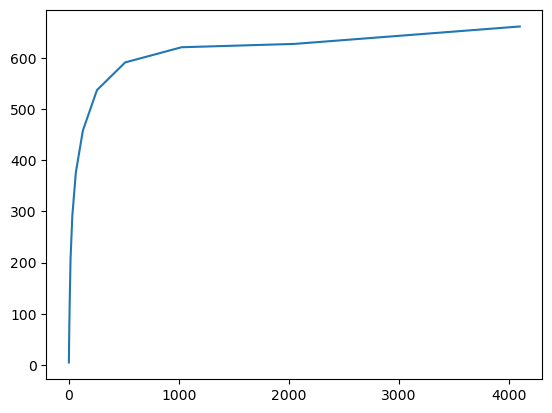

In [9]:
grouped_data = df_gpu.groupby("OriginalMB")
decomp_mean = grouped_data.agg({'decomp_bw':'mean'})
plt.plot(decomp_mean.index,decomp_mean["decomp_bw"])

In [10]:
def gpu_decomp_bw(orisize):
    return np.interp(orisize,decomp_mean.index,decomp_mean["decomp_bw"])
test = gpu_decomp_bw(1000)
print(test)

619.6153890454634


In [19]:
nvmeBw = 2000 # MB
NetBw = 125 # MB

def MGARD_Latency(tol,OriSize):
    d = {}
    d["total_time"] = OriSize/nvmeBw + OriSize/gpu_comp_bw(OriSize) + OriSize/comp_ratio(tol)/NetBw + OriSize/gpu_decomp_bw(OriSize)
    d["load_time"] =  OriSize/nvmeBw
    d["transfer_time"] = OriSize/comp_ratio(tol)/NetBw
    d["comp_time"] =  OriSize/gpu_comp_bw(OriSize)
    d["decomp_time"] = OriSize/gpu_decomp_bw(OriSize)
    return d

In [20]:
import pandas as pd

# Initialize an empty DataFrame
Latency_df = pd.DataFrame(columns=['tol', 'OriSizeMB', 'l'])

# Create a list to store dictionaries for each row
data = []

# reduced 
tols = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5, 1]

# Loop through the desired range of 'tol' and 'OriSize'
for tol in tols:  # Adjust the range as needed
    if tol == 0:
        continue
    for OriSize in range(0, 4000, 100):
        if OriSize == 0:
            continue
        d = MGARD_Latency(tol, OriSize)  # Convert 'tol' to float
        # Create a dictionary for the current row
        row_dict = {'tol': tol, 
                    'OriSize': OriSize, 
                    'total_latency': d["total_time"],
                    'load_time' : d["load_time"],
                    'transfer_time' : d["transfer_time"],
                    'comp_time':d["comp_time"],
                    'decomp_time':d["decomp_time"]
                    }
        # Append the dictionary to the list
        data.append(row_dict)

# Convert the list of dictionaries into a DataFrame
Latency_df = pd.DataFrame(data)

# Display the resulting DataFrame
print(Latency_df)


         tol  OriSize  total_latency  load_time  transfer_time  comp_time  \
0    0.00001      100       1.095157       0.05       0.477934   0.330358   
1    0.00001      200       2.049806       0.10       0.955869   0.596031   
2    0.00001      300       2.985212       0.15       1.433803   0.852497   
3    0.00001      400       3.936194       0.20       1.911737   1.119822   
4    0.00001      500       4.868190       0.25       2.389672   1.379341   
..       ...      ...            ...        ...            ...        ...   
502  1.00000     3500      18.015408       1.75       1.045985   9.848907   
503  1.00000     3600      18.558453       1.80       1.075870  10.172696   
504  1.00000     3700      19.103510       1.85       1.105755  10.499205   
505  1.00000     3800      19.650620       1.90       1.135641  10.828471   
506  1.00000     3900      20.199824       1.95       1.165526  11.160527   

     decomp_time  
0       0.236864  
1       0.397906  
2       0.548912  

In [21]:
Latency_df.to_csv("./Latency_0921_reduced.csv",index=False)